In [7]:
!pip install opendatasets

In [8]:
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import os
import opendatasets as od

In [9]:
od.download('https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juanacosta285
Your Kaggle Key: ··········


100%|██████████| 583M/583M [00:07<00:00, 84.4MB/s]


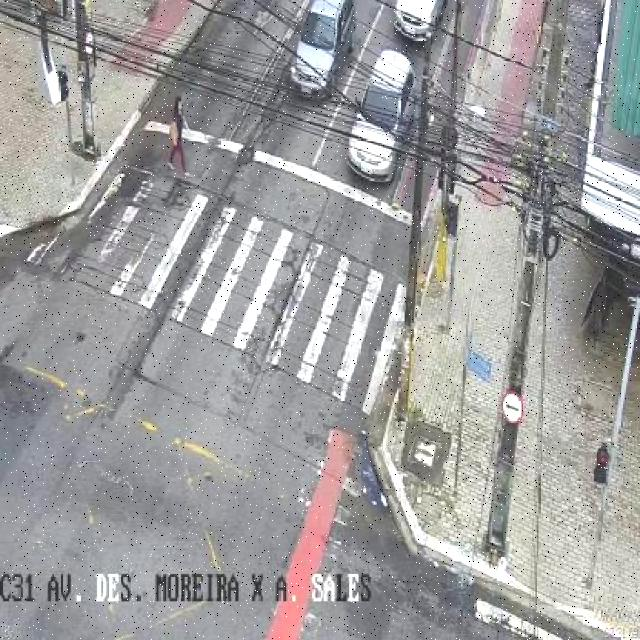

In [11]:
train_img = 'traffic-detection-project/train/images/ant_sales-1865_png_jpg.rf.88032b0188f7c863a8acf5068c479cd1.jpg'

img = cv.imread(train_img)
cv2_imshow(img)